In [120]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
import matplotlib.animation as animation
from tqdm import trange, tqdm
from math import floor

%cd ..
from src.data_handling import *
%cd notebooks

c:\Users\nicis\OneDrive - UNSW\RedbackNMP\redback_ds_nmp
c:\Users\nicis\OneDrive - UNSW\RedbackNMP\redback_ds_nmp\notebooks


In [75]:
# Gets the output data for setup 0
%cd ..
df = load_setup_output(0)
%cd notebooks
# Gets X,Y,Z,Time data from lap 1
df = df[['WorldPosition_X', 'WorldPosition_Y', 'WorldPosition_Z', 'acsys.CS.LapTime', 'acsys.CS.LapCount']]

c:\Users\nicis\OneDrive - UNSW\RedbackNMP\redback_ds_nmp
c:\Users\nicis\OneDrive - UNSW\RedbackNMP\redback_ds_nmp\notebooks


In [83]:
# get lap times
def get_lap_times(data):
    data = data[["acsys.CS.LapCount", "acsys.CS.LapTime"]][data["acsys.CS.LapCount"].diff().shift(-1).fillna(1) == 1].set_index("acsys.CS.LapCount").iloc[:,0]
    # data.index += 1
    return data

lap_times = get_lap_times(df)
lap_times

acsys.CS.LapCount
0      59979
1      40302
2     126564
3      40461
4     144261
5      40722
6      40563
7     145758
8      40590
9      40401
10    135387
11     40386
12    179655
13     40494
14     77190
Name: acsys.CS.LapTime, dtype: int64

18.0%
frames=499, interval=253.63527054108218, lap_time=126564
0.0%
0.0%
0.20040080160320642%
0.40080160320641284%
0.6012024048096193%
0.8016032064128257%
1.002004008016032%
1.2024048096192386%
1.402805611222445%
1.6032064128256514%
1.8036072144288577%
2.004008016032064%
2.2044088176352705%
2.404809619238477%
2.6052104208416833%
2.80561122244489%
3.006012024048096%
3.2064128256513027%
3.406813627254509%
3.6072144288577155%
3.8076152304609217%
4.008016032064128%
4.208416833667335%
4.408817635270541%
4.609218436873747%
4.809619238476954%
5.01002004008016%
5.210420841683367%
5.410821643286573%
5.61122244488978%
5.811623246492986%


6.012024048096192%
6.212424849699399%
6.412825651302605%
6.613226452905812%
6.813627254509018%
7.014028056112225%
7.214428857715431%
7.414829659318637%
7.615230460921843%
7.81563126252505%
8.016032064128256%
8.216432865731463%
8.41683366733467%
8.617234468937875%
8.817635270541082%
9.01803607214429%
9.218436873747494%
9.418837675350701%
9.619238476953909%
9.819639278557114%
10.02004008016032%
10.220440881763528%
10.420841683366733%
10.62124248496994%
10.821643286573146%
11.022044088176353%
11.22244488977956%
11.422845691382765%
11.623246492985972%
11.823647294589179%
12.024048096192384%
12.224448897795591%
12.424849699398798%
12.625250501002004%
12.82565130260521%
13.026052104208416%
13.226452905811623%
13.42685370741483%
13.627254509018035%
13.827655310621243%
14.02805611222445%
14.228456913827655%
14.428857715430862%
14.629258517034069%
14.829659318637274%
15.030060120240481%
15.230460921843687%
15.430861723446894%
15.6312625250501%
15.831663326653306%
16.03206412825651%
16.232464929

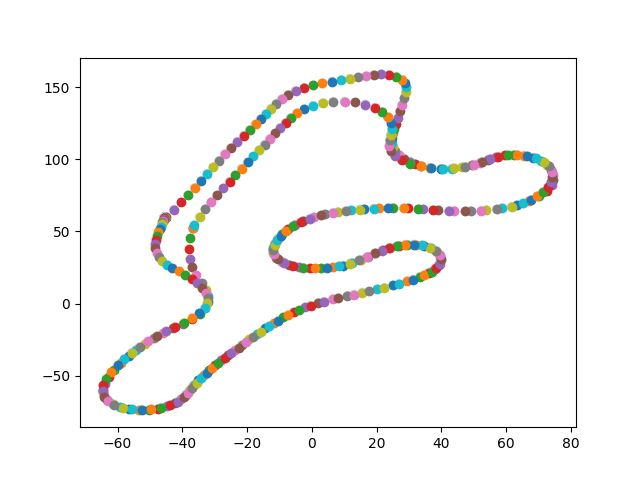

0.44488977955911824%
2.004008016032064%
1.2024048096192386%
1.6032064128256514%
4.008016032064128%
0.07014028056112225%


In [137]:
#sns.scatterplot(data=df, x='WorldPosition_X', y='WorldPosition_Y', z='WorldPosition_Z')

lap_n = 2
shrink_factor = 10


df1 = df[df['acsys.CS.LapCount'] == lap_n]
df1 = df1.iloc[::shrink_factor]

lap_time = lap_times[lap_n]
frames = len(df1)
interval = (lap_time) / frames
fps = (10**3)/interval

print(f'{frames=}, {interval=}, {lap_time*10**-3=}, {fps=}')

# lap_time_ms = lap_times[lap_count]
# lap_time = lap_time_ms * 10**-3

# skip = floor(len(df1) / (lap_time * fps))
# frames = floor(fps * lap_time)
# print(f'{interval=} {interval*frames=}')
# quick maths to keep the animation length true to its data


fig, ax = plt.subplots()
ax.scatter(x=df1['WorldPosition_X'], y=df1['WorldPosition_Z'], c=df1['WorldPosition_Y'], cmap='Pastel2')

def update(i):
    data = df1.iloc[i]
    #ax.plot(data['WorldPosition_X'], data['WorldPosition_Z'])
    ax.scatter(x=data['WorldPosition_X'], y=data['WorldPosition_Z'], cmap='GREEN')
    print(f'{100*i/frames}%')

ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval)
ani.save(f'animation_lap{lap_n:02}.mp4', writer=animation.FFMpegWriter(fps=fps))